<a href="https://colab.research.google.com/github/adityavsarkar19/Player-Performance-Prediction-/blob/main/Performance_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding The Dataset


In [3]:
#Loading the Datasets

import numpy as np
import pandas as pd 

train = pd.read_csv("/content/train.csv") #dataset source: https://www.kaggle.com/datasets/arnabchaki/player-performance-assessment?select=test.csv
test = pd.read_csv("/content/test.csv")

In [7]:
test


,row_id,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,14785,16,draw,team1,7.0,4.0,4.0,0.317073,0.44,0.0,...,0.268842,0.190509,0.311739,0.628642,0.405323,0.309039,0.114849,0.454992,0.304133,0.328816
1,15125,2,draw,team1,9.0,11.0,11.0,0.560976,0.60,0.0,...,0.346640,0.198072,0.246104,0.536949,0.486006,0.487637,0.105279,0.501402,0.381214,0.499620
2,13095,16,loser,team2,10.0,19.0,19.0,0.195122,0.30,0.0,...,0.351175,0.177065,0.262470,0.650741,0.567063,0.486774,0.062118,0.251021,0.586227,0.267774
3,6079,16,loser,team1,11.0,3.0,9.0,0.341463,0.30,0.0,...,0.496021,0.313902,0.405065,0.490855,0.591251,0.608131,0.294538,0.322264,0.685016,0.293783
4,16584,11,winner,team1,5.0,4.0,4.0,0.585366,0.70,0.2,...,0.396398,0.191068,0.042083,0.838704,0.689723,0.522480,0.090986,0.437002,0.476399,0.437500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8586,15658,11,loser,team2,5.0,17.0,17.0,0.634146,0.60,0.0,...,0.318320,0.206344,0.150613,0.537025,0.548942,0.634263,0.153590,0.357501,0.501917,0.250000
8587,17770,15,draw,team2,15.0,2.0,2.0,0.512195,0.46,0.0,...,0.283302,0.161499,0.104712,0.818021,0.744581,0.473998,0.134247,0.364871,0.557557,0.181294
8588,11354,3,draw,team1,14.0,12.0,12.0,0.414634,0.48,0.0,...,0.235429,0.217160,0.131584,0.572265,0.758360,0.430729,0.154029,0.231828,0.566556,0.303663
8589,27541,16,loser,team2,10.0,9.0,9.0,0.341463,0.20,0.0,...,0.742798,0.161836,0.149774,0.839283,0.494556,0.425268,0.055602,0.225830,0.333859,0.346147


In [ ]:
# Generate a correlation matrix.
train.corr()

#too many columns to evaluate 

,row_id,scout_id,rating_num,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
row_id,1.000000,0.017885,-0.167852,0.032443,0.003965,0.005554,-0.012078,-0.010551,-0.037521,0.001232,...,0.006372,-0.016581,-0.009663,0.010920,0.008544,-0.002126,-0.009874,-0.005428,-0.008082,0.026936
scout_id,0.017885,1.000000,0.013590,0.041903,-0.010558,-0.007104,-0.021856,-0.038816,0.003574,-0.003382,...,0.007296,0.007516,-0.001189,-0.024087,0.042262,0.013332,-0.003362,0.027326,0.033307,0.020558
rating_num,-0.167852,0.013590,1.000000,-0.068516,0.019457,0.022495,-0.014785,-0.053880,0.117848,-0.020071,...,0.022215,0.028937,0.019037,-0.017786,-0.023993,0.010867,0.025713,0.016586,0.033952,-0.011991
competitionId,0.032443,0.041903,-0.068516,1.000000,-0.002132,-0.007870,0.010574,-0.011889,0.027847,0.000404,...,0.022037,0.025652,0.048990,0.004663,0.033632,0.014912,0.000775,-0.019079,0.196055,-0.018709
player_position_1,0.003965,-0.010558,0.019457,-0.002132,1.000000,0.954262,-0.080985,-0.040299,0.130674,-0.030808,...,-0.010303,-0.000996,0.010647,-0.015540,-0.003472,0.001327,0.005485,0.014589,-0.011718,0.007915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
team2_defensive_derived_var_15,-0.002126,0.013332,0.010867,0.014912,0.001327,-0.004716,0.014221,0.018672,0.016705,-0.004716,...,0.071105,0.237930,-0.113489,0.157603,0.492222,1.000000,0.289166,0.312034,0.221454,-0.132890
team2_offensive_derived_var_16,-0.009874,-0.003362,0.025713,0.000775,0.005485,0.000884,-0.000046,0.014069,0.044370,0.005231,...,0.075035,0.741696,0.264865,-0.166565,0.332019,0.289166,1.000000,0.020408,0.175557,0.035632
team2_defensive_derived_var_17,-0.005428,0.027326,0.016586,-0.019079,0.014589,0.010171,0.018884,0.011171,-0.019371,-0.011628,...,-0.163826,0.051611,0.031969,-0.027016,0.161296,0.312034,0.020408,1.000000,0.076861,0.086896
team2_offensive_derived_var_18,-0.008082,0.033307,0.033952,0.196055,-0.011718,-0.013271,-0.006083,0.002757,0.026901,0.002473,...,-0.021379,0.369433,0.007530,-0.036860,0.585079,0.221454,0.175557,0.076861,1.000000,-0.208941


###Empty and Null Columns

In [4]:
nan_cols = [i for i in train.columns if train[i].isnull().all()]
nan_cols

['team1_other_raw_var_19',
 'team1_other_raw_var_31',
 'team1_other_raw_var_33',
 'team1_other_raw_var_38',
 'team1_other_raw_var_40',
 'team1_other_raw_var_43',
 'team1_other_raw_var_50',
 'team1_other_raw_var_51',
 'team1_other_raw_var_72',
 'team1_other_raw_var_82',
 'team1_other_raw_var_92',
 'team1_other_ratio_var_32',
 'team1_other_ratio_var_33',
 'team2_other_raw_var_19',
 'team2_other_raw_var_31',
 'team2_other_raw_var_33',
 'team2_other_raw_var_38',
 'team2_other_raw_var_40',
 'team2_other_raw_var_43',
 'team2_other_raw_var_50',
 'team2_other_raw_var_51',
 'team2_other_raw_var_72',
 'team2_other_raw_var_82',
 'team2_other_raw_var_92',
 'team2_other_ratio_var_32',
 'team2_other_ratio_var_33']

### Checking for Skewed Distribution using Box Plots

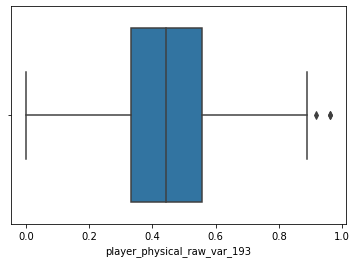

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='player_physical_raw_var_193', data=train)

#Raw variables have normal distribution generally


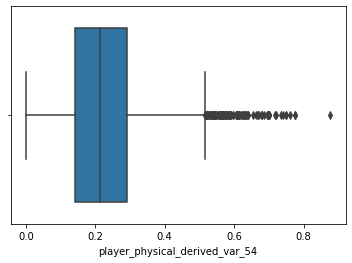

In [ ]:
#derived and ratio columns have skewed distribution mostly
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='player_physical_derived_var_54', data=train)

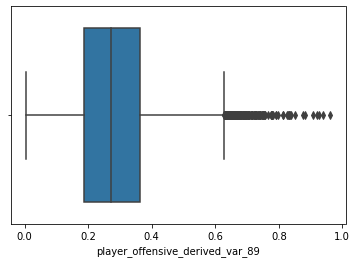

In [ ]:
#derived and ratio columns have skewed distribution mostly
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='player_offensive_derived_var_89', data=train)

### Checking for Multimodal Distributions

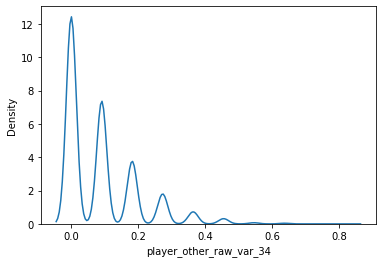

In [ ]:
import seaborn as sns
sns.kdeplot(data=train, x="player_other_raw_var_34")

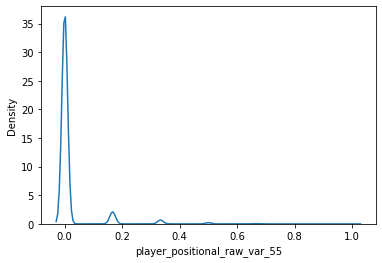

In [ ]:
import seaborn as sns
sns.kdeplot(data=train, x="player_positional_raw_var_55")

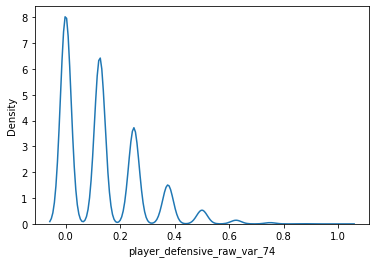

In [ ]:
import seaborn as sns
sns.kdeplot(data=train, x="player_defensive_raw_var_74")

# Pre-Processing
### Some Observations after Analysis in R and Excel are as follows:
1. There are plenty of Null and Zero columns which need to be removed. 
2. 50 columns which have more than 80% Null Values and some of them even had 100% Null Values.
3. There are plenty of highly corelated columns which needs to be removed.
4. The train data is not uniformly distributed , there are columns with Skewed Distribution (especially the  Ratio and Derived Vars).
5. A lot of columns have multimodal distribution.



In [5]:
#Dropping "rating_num" from training set
x_train = train.drop(['rating_num'], axis = 1)
x_test = test.copy()

In [6]:
# Dropping the row_id
combo = pd.concat([x_train,x_test])
combo = combo.drop(['row_id'], axis = 1)
combo

,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,13,winner,team1,8.0,7.0,7.0,0.317073,0.48,0.0,0,...,0.193658,0.131548,0.097131,0.600944,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925
1,16,loser,team2,8.0,3.0,9.0,0.463415,0.42,0.0,0,...,0.190500,0.173697,0.272801,0.605659,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392
2,4,loser,team1,5.0,11.0,11.0,0.682927,0.44,0.0,0,...,0.312314,0.250756,0.212631,0.558833,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500
3,13,loser,team2,4.0,17.0,17.0,0.682927,0.58,0.0,0,...,0.282556,0.155969,0.206503,0.533002,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558
4,11,draw,team1,5.0,10.0,10.0,0.731707,0.70,0.0,0,...,0.450453,0.199050,0.134002,0.688773,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8586,11,loser,team2,5.0,17.0,17.0,0.634146,0.60,0.0,0,...,0.318320,0.206344,0.150613,0.537025,0.548942,0.634263,0.153590,0.357501,0.501917,0.250000
8587,15,draw,team2,15.0,2.0,2.0,0.512195,0.46,0.0,0,...,0.283302,0.161499,0.104712,0.818021,0.744581,0.473998,0.134247,0.364871,0.557557,0.181294
8588,3,draw,team1,14.0,12.0,12.0,0.414634,0.48,0.0,0,...,0.235429,0.217160,0.131584,0.572265,0.758360,0.430729,0.154029,0.231828,0.566556,0.303663
8589,16,loser,team2,10.0,9.0,9.0,0.341463,0.20,0.0,0,...,0.742798,0.161836,0.149774,0.839283,0.494556,0.425268,0.055602,0.225830,0.333859,0.346147


### Dropping 100% Null Columns

In [7]:
for column in combo.select_dtypes('float64').columns.to_list():
    if combo[column].isnull().sum()/len(combo) == 1:
        combo = combo.drop(column,axis=1)

### Replacing other Null Data Points with Mean 

In [8]:
for column in combo.select_dtypes('float64').columns.to_list():
    if combo[column].isnull().sum() != 0:
        combo[column] = combo[column].fillna(combo[column].mean())

In [9]:
# Replace winner,draw, loser with 1,0,-1 in winner column
# Replace team1 with 1 and team2 with zero in team column.

combo['team'] = np.where(combo['team']!= 'team1', 1, 0)
combo['winner'] = np.where(combo['winner']== 'winner', 1, np.where(combo['winner']== 'loser', -1,0 ))

### Quantile Tranformations to Handle Skewed Distributions in the Dataset 
### We are converting the skewed distribution to a normal distribution


In [10]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('player_general_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 


In [11]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('player_general_derived_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 


In [12]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('player_defensive_ratio_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 


In [13]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('player_defensive_derived_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 

In [14]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('player_offensive_derived_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 

In [15]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('player_offensive_ratio_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 

In [16]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('player_physical_derived_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 

In [17]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('team1_offensive_ratio_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 

In [18]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('team1_offensive_derived_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 

In [19]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('team2_offensive_derived_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 

In [20]:
from sklearn.preprocessing import QuantileTransformer
list1 = [x for x in combo.columns.to_list() if x.startswith('team2_offensive_ratio_var')] 
for column in list1:
    transform = QuantileTransformer(output_distribution = 'normal')
    combo[column] = transform.fit_transform(combo[column].values.reshape(-1,1)) 

### Label Encoding the Multimodial Variables
### Add more info and modify code ffs

In [21]:
l1 = [x for x in combo.columns.to_list() if x.startswith('player_general_raw_var')]
for column in l1:
    combo[column] = combo[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l1:
    lb = LabelEncoder()
    combo[column] = lb.fit_transform(combo[column].values.reshape(-1,1))
    
    
    
l2 = [x for x in combo.columns.to_list() if x.startswith('player_defensive_raw_var')]
for column in l2:
    combo[column] = combo[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l2:
    lb = LabelEncoder()
    combo[column] = lb.fit_transform(combo[column].values.reshape(-1,1))
    

l3 = [x for x in combo.columns.to_list() if x.startswith('player_offensive_raw_var')]
for column in l3:
    combo[column] = combo[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l3:
    lb = LabelEncoder()
    combo[column] = lb.fit_transform(combo[column].values.reshape(-1,1))
    
    
l4 = [x for x in combo.columns.to_list() if x.startswith('team1_offensive_raw_var')]
for column in l4:
    combo[column] = combo[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l4:
    lb = LabelEncoder()
    combo[column] = lb.fit_transform(combo[column].values.reshape(-1,1))
    
    
l5 = [x for x in combo.columns.to_list() if x.startswith('team1_defensive_raw_var')]
for column in l5:
    combo[column] = combo[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l5:
    lb = LabelEncoder()
    combo[column] = lb.fit_transform(combo[column].values.reshape(-1,1))
    
    
l6 = [x for x in combo.columns.to_list() if x.startswith('team2_offensive_raw_var')]
for column in l6:
    combo[column] = combo[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l6:
    lb = LabelEncoder()
    combo[column] = lb.fit_transform(combo[column].values.reshape(-1,1))
    
    
l7 = [x for x in combo.columns.to_list() if x.startswith('team2_defensive_raw_var')]
for column in l7:
    combo[column] = combo[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l7:
    lb = LabelEncoder()
    combo[column] = lb.fit_transform(combo[column].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
category_columns=combo.select_dtypes(include=['object']).columns.tolist()
integer_columns=combo.select_dtypes(include=['int64','float64']).columns.tolist()
len(category_columns),len(integer_columns)

(0, 772)

In [23]:
from sklearn.preprocessing import LabelEncoder
for column in combo.select_dtypes('object').columns.to_list():
    lb = LabelEncoder()
    combo[column] = lb.fit_transform(combo[column].values.reshape(-1,1))
    

In [24]:
category_columns=combo.select_dtypes(include=['object']).columns.tolist()
integer_columns=combo.select_dtypes(include=['int64','float64']).columns.tolist()
len(category_columns),len(integer_columns)

(0, 772)

In [25]:
#defing category features
category_attribs = ['scout_id','winner','team','team1_system_id','team2_system_id','competitionId','player_position_1','player_position_2']
category_attribs = category_attribs+l1+l2+l3+l4+l5+l6+l7
for column in category_attribs:
    combo[column] = combo[column].astype('int64')

### Test-Train Split

In [26]:
df_train = combo.head(train.shape[0])
df_test = combo.tail(test.shape[0])

x = df_train
y = train['rating_num']

In [27]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=101)

# Testing Models

### CATBOOST


In [35]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from catboost import CatBoostRegressor #Reference: https://towardsdatascience.com/catboost-regression-in-6-minutes-3487f3e5b329
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#With Categorical Features
#cbr = CatBoostRegressor(verbose = False , eval_metric = 'R2', iterations= 1000, learning_rate= 0.3)
cbr = CatBoostRegressor(verbose = False , eval_metric = 'R2', cat_features=category_attribs)
cbr.fit(x_train,y_train)

preds = cbr.predict(x_test)

print('Training Score',r2_score(y_train,cbr.predict(x_train)))
print()
print('Test Score',r2_score(y_test,cbr.predict(x_test)))
print()
print('RMSE:',np.sqrt(mean_squared_error(y_test, preds)))
feature_importance = cbr.feature_importances_
sorted_idx = np.argsort(feature_importance)[-20:]

Training Score 0.9650795009490134

Test Score 0.33960358618260067

RMSE: 1.4913096769526342


### Feature Importance

Text(0.5, 1.0, 'Feature Importance - CatBoost')

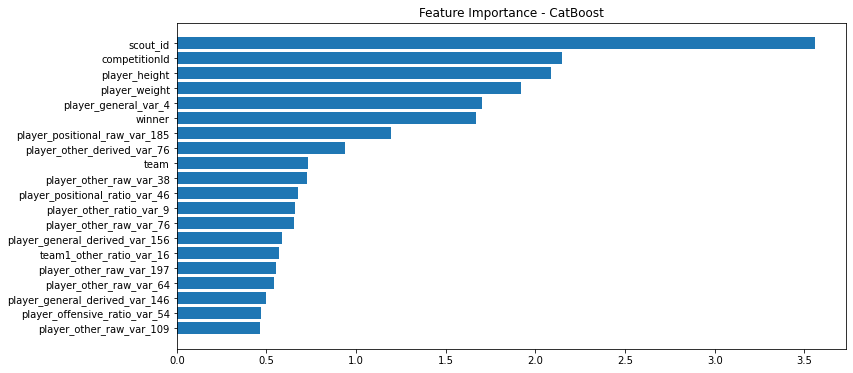

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance - CatBoost')

### XGBoost

#### Results:
  100 iterations


Training Score 0.26879900487252384

Test Score 0.19929246602567086

  200 ITERATIONS
Training Score 0.317811625117539

Test Score 0.2202232731488305
RMSE: 1.6205059031481233

  200 ITERATIONS
Training Score 0.3573979507192011

Test Score 0.23620017332791832
RMSE: 1.6038186545280422

  150 iterations + 0.1
Training Score 0.32027371061427523

Test Score 0.2249810587133253
RMSE: 1.6155546036545345
 

  1000 iterations + 0.3
Training Score 0.8806578411265495

Test Score 0.3148422299295407
RMSE: 1.5190105020071942


In [47]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
xgb = XGBRegressor(n_estimators = 1000, learning_rate=0.1)
xgb.fit(x_train,y_train)

preds = xgb.predict(x_test)

print('Training Score',r2_score(y_train,xgb.predict(x_train)))
print()
print('Test Score',r2_score(y_test,xgb.predict(x_test)))
print('RMSE:',np.sqrt(mean_squared_error(y_test, preds)))
feature_importance = xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)[-20:]

[12:00:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Score 0.6482707292423282

Test Score 0.3152883601363955
RMSE: 1.518515881023729


Text(0.5, 1.0, 'Feature Importance - XgBoost')

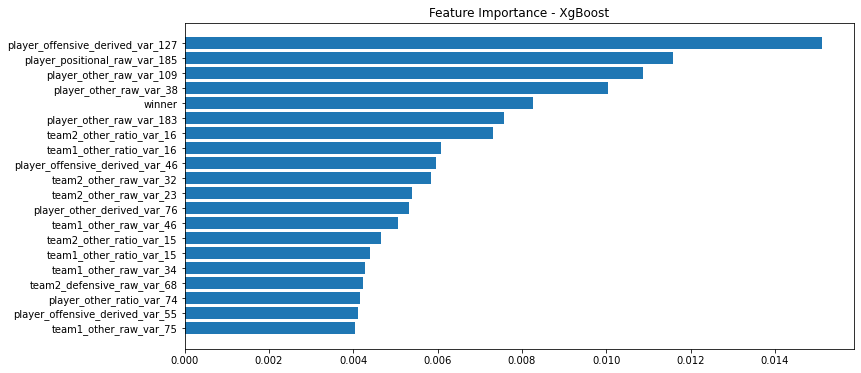

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance - XgBoost')

In [49]:
#with cat_attribs
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
xgb = XGBRegressor(n_estimators = 1000, learning_rate=0.1, categorical_feature = category_attribs)
xgb.fit(x_train,y_train)

preds = xgb.predict(x_test)

print('Training Score',r2_score(y_train,xgb.predict(x_train)))
print()
print('Test Score',r2_score(y_test,xgb.predict(x_test)))
print('RMSE:',np.sqrt(mean_squared_error(y_test, preds)))
feature_importance = xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)[-20:]

[12:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Score 0.6482707292423282

Test Score 0.3152883601363955
RMSE: 1.518515881023729


##### Turns out XgBoost automatically recgonizes the label encoded categorical features :)

### LightGBM

In [33]:
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lgbmr = lgb.LGBMRegressor(n_estimators = 2000, learning_rate=0.2)
lgbmr.fit(x_train,y_train)

preds = lgbmr.predict(x_test)

print('Training Score',r2_score(y_train,lgbmr.predict(x_train)))
print()
print('Test Score',r2_score(y_test,lgbmr.predict(x_test)))
print('RMSE:',np.sqrt(mean_squared_error(y_test, preds)))
feature_importance = lgbmr.feature_importances_
sorted_idx = np.argsort(feature_importance)[-20:]

Training Score 0.9998864876708596

Test Score 0.3641706869682645
RMSE: 1.4633080299145171


##### Results
500 iterations + 0.1
Training Score 0.9105227403729481

Test Score 0.3667164194697522
RMSE: 1.460375696545556

1000 iterations + 0.1
Training Score 0.9834594655726425

Test Score 0.3879865383894856
RMSE: 1.4356413885694483

1000 iterations + 0.2
Training Score 0.9985536407267185

Test Score 0.36318447891307326
RMSE: 1.4644424279182542

2000 iterations + 0.2

Training Score 0.9998864876708596

Test Score 0.3641706869682645
RMSE: 1.4633080299145171


Text(0.5, 1.0, 'Feature Importance - LightGBM')

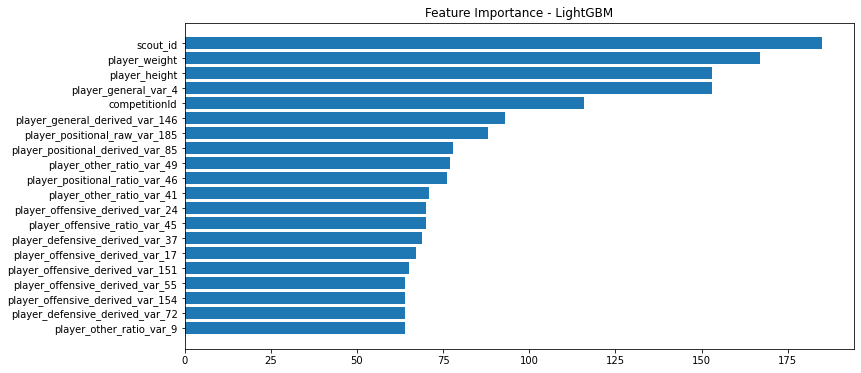

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance - LightGBM')

### Stacking Regressor

###### CATBOOST + LGBM

In [ ]:
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
stk = StackingRegressor([('cbr',CatBoostRegressor(verbose = False , eval_metric = 'R2',cat_features=category_attribs)),
                        ('lgbmr',lgb.LGBMRegressor(n_estimators = 150, learning_rate=0.2))])
stk.fit(x_train,y_train)

preds = stk.predict(x_test)

print('Training Score',r2_score(y_train,stk.predict(x_train)))
print()
print('Test Score',r2_score(y_test,stk.predict(x_test)))
print('RMSE:',np.sqrt(mean_squared_error(y_test, preds)))

###### XgBoost + LGBM

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
stk = StackingRegressor([('xgb',CatBoostRegressor(verbose = False , eval_metric = 'R2',cat_features=category_attribs)),
                        ('lgbmr',lgb.LGBMRegressor(n_estimators = 150, learning_rate=0.2))])
stk.fit(x_train,y_train)

preds = stk.predict(x_test)

print('Training Score',r2_score(y_train,stk.predict(x_train)))
print()
print('Test Score',r2_score(y_test,stk.predict(x_test)))
print('RMSE:',np.sqrt(mean_squared_error(y_test, preds)))